<a href="https://colab.research.google.com/github/abhi-11nav/Wine-Quality-Prediction/blob/main/Wine_Quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Credits

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
# Import libraries for data import and manipulation

import pandas as pd
import numpy as np 

In [2]:
# Link to dataset uploaded on github repository 

raw_data_path = "https://raw.githubusercontent.com/abhi-11nav/Wine-Quality-Prediction/main/winequality-red.csv"

In [3]:
# Importing the data and storing it in a variable 

dataset = pd.read_csv(raw_data_path)

In [4]:
# Printing out the first 5 rows of the dataset

dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Features of the dataset

dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

"Quality" is the dependent feature and the rest are independent features of the dataset 

In [6]:
# Let us check for any missing values in the dataset

dataset.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Well, there are no missing values in the dataset

In [7]:
# Importing visualization libraries

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

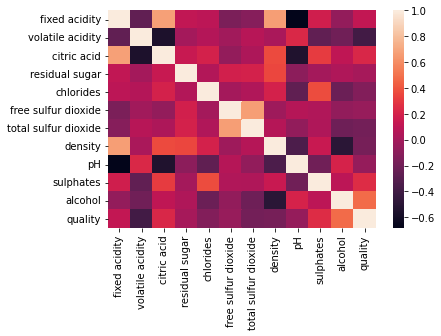

In [8]:
# Plotting the heatmamp between variables correlation

sns.heatmap(dataset.corr())

We have some features that seem correlated , Let us explore these pairs a bit more:

[citric acid, fixed acidity], [density - fixed acidity], [pH, fixed acidity], [total suflur dioxide, free sulfur dioxide]


In [9]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


#### The following correlations are taken a note of :



[citric acid, fixed acidity] : 0.67

[density, fixed acidity] : 0.66

[pH, fixed acidity] : -0.68

[total suflur dioxide, free sulfur dioxide] : 0.66

We are going to ignore the concept of linearity as I am yet to explore it's affects on deep learning models.


In [11]:
# Now let us look at some descriptive statistics of the data

dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
# Filtering for categorical and numeric data 

cat_data_len = 0
for cols in dataset.columns:
  if type(dataset[cols][0]) == str:
    cat_data_len+=1
if type(dataset[cols][0]) == str:
  print("There is categorical data present in the dataset")
else:
  print("There is no categorical data present in the dataset")

There is no categorical data present in the dataset


In [50]:
# Let us divide out data into dependent and independent variables

X = dataset.drop("quality",axis=1)
y = dataset["quality"]

In [51]:
# Let us scale our data using the StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [52]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [55]:
# Train and validation sets

from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y , test_size=0.2)

In [56]:
# Importing libraries for builidng a model 

import tensorflow as tf
from tensorflow import keras 

from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
from tensorflow.keras.models import Model, Sequential

In [86]:
input_layer = keras.layers.Input(shape=X.shape[1:])
first_layer = keras.layers.Dense(50, activation='relu')(input_layer)
second_layer = keras.layers.Dense(50, activation="relu")(first_layer)
output_layer = keras.layers.Dense(X.shape[1])(second_layer)

In [87]:
model = keras.models.Model(inputs = [input_layer], outputs=[output_layer])

In [109]:
model.compile(optimizer="sgd", loss="mean_squared_error", metrics=["mean_squared_error"])

In [110]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_20 (Dense)            (None, 50)                600       
                                                                 
 dense_21 (Dense)            (None, 50)                2550      
                                                                 
 dense_22 (Dense)            (None, 11)                561       
                                                                 
Total params: 3,711
Trainable params: 3,711
Non-trainable params: 0
_________________________________________________________________


In [112]:
history = model.fit(train_X, train_y, epochs = 50, validation_data=([val_X,val_y]))

Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2956 - mean_squared_error: 0.2956 - val_loss: 0.4201 - val_mean_squared_error: 0.4201
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2962 - mean_squared_error: 0.2962 - val_loss: 0.4161 - val_mean_squared_error: 0.4161
Epoch 3/50
40/40 [==============================] - 0s 5ms/step - loss: 0.2976 - mean_squared_error: 0.2976 - val_loss: 0.4160 - val_mean_squared_error: 0.4160
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2929 - mean_squared_error: 0.2929 - val_loss: 0.4301 - val_mean_squared_error: 0.4301
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2951 - mean_squared_error: 0.2951 - val_loss: 0.4173 - val_mean_squared_error: 0.4173
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2955 - mean_squared_error: 0.2955 - val_loss: 0.4197 - val_mean_squared_error: 0.4197
Epoch 7/50
40/40 [======================

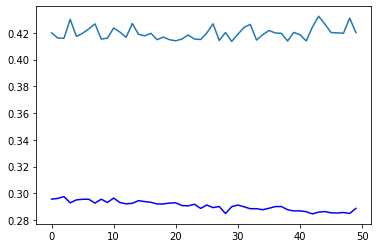

In [113]:
plt.plot(history.history["mean_squared_error"],color="blue")
plt.plot(history.history["val_mean_squared_error"])